In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [2]:
image_url = "https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg"
image_filepath = 'dog.jpg'
gcv.utils.download(url=image_url, path = image_filepath)

100%|██████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 1126.64KB/s]


'dog.jpg'

In [3]:
image = mx.image.imread(image_filepath)
image.shape, image.dtype, image.min().asscalar(), image.max().asscalar()

((576, 768, 3), numpy.uint8, 0, 255)

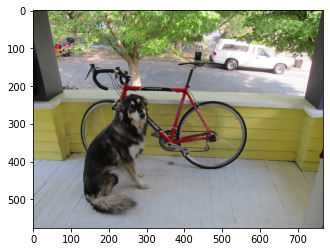

In [4]:
plt.imshow(image.asnumpy())

In [5]:
image, chw_image = gcv.data.transforms.presets.yolo.transform_test(image, short=512)
image.shape, image.dtype, image.min().asscalar(), image.max().asscalar()

((1, 3, 512, 683), numpy.float32, -2.117904, 2.64)

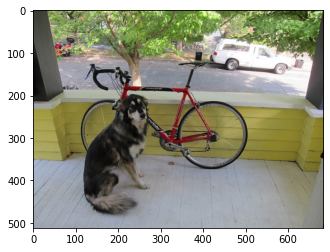

In [7]:
plt.imshow(chw_image) #short edge is now 512

In [8]:
network = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained=True)

In [9]:
prediction = network(image)

In [10]:
type(prediction)

tuple

In [11]:
for idx, arr in enumerate(prediction):
    print(" #{} shape {}".format(idx, arr.shape))

 #0 shape (1, 100, 1)
 #1 shape (1, 100, 1)
 #2 shape (1, 100, 4)


In [12]:
#0 - obj class indexes
#1 - obj class probabilities
#2 - obj blounding box coordinates

prediction = [arr[0] for arr in prediction]

In [13]:
class_idx, probab, bounding_boxes = prediction

In [14]:
k=10
class_idx[:k]


[[16.]
 [ 1.]
 [ 7.]
 [ 2.]
 [13.]
 [ 0.]
 [58.]
 [-1.]
 [-1.]
 [-1.]]
<NDArray 10x1 @cpu(0)>

In [16]:
#-1 means no detected object

network.classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [18]:
network.classes[16], network.classes[1], network.classes[7],  network.classes[2], network.classes[58]

('dog', 'bicycle', 'truck', 'car', 'potted plant')

In [19]:
probab[:k]


[[ 0.9922735 ]
 [ 0.9646552 ]
 [ 0.6890209 ]
 [ 0.23493634]
 [ 0.01805799]
 [ 0.01063591]
 [ 0.01027783]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
<NDArray 10x1 @cpu(0)>

In [20]:
bounding_boxes[:k]


[[116.383095 201.52261  281.88876  482.33267 ]
 [ 94.03961  107.238846 504.9234   376.52264 ]
 [417.18365   69.68815  614.6805   149.04834 ]
 [417.18365   69.68815  614.6805   149.04834 ]
 [ 91.044464 124.7944   504.3832   403.5773  ]
 [532.793     92.20426  547.2879   104.81126 ]
 [ 51.13082   68.555534  95.09498  111.6173  ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]]
<NDArray 10x4 @cpu(0)>

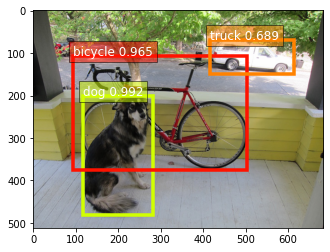

In [22]:
gcv.utils.viz.plot_bbox(chw_image, bounding_boxes, probab, class_idx, class_names=network.classes)

In [23]:
##Let's try this one https://ccsearch.creativecommons.org/photos/0db1276c-63cc-4f9d-93a0-026563696141##
image = mx.image.imread('street_food.jpg')
image.shape, image.dtype, image.min().asscalar(), image.max().asscalar()


((740, 1110, 3), numpy.uint8, 0, 255)

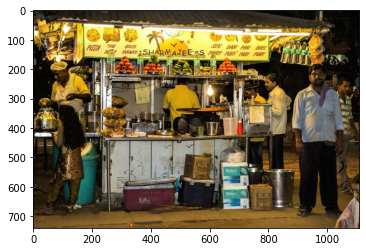

In [24]:
plt.imshow(image.asnumpy())

In [25]:
image, chw_image = gcv.data.transforms.presets.yolo.transform_test(image, short=512)
image.shape, image.dtype, image.min().asscalar(), image.max().asscalar()

((1, 3, 512, 768), numpy.float32, -2.117904, 2.64)

In [26]:
prediction = network(image)

In [27]:
prediction = [arr[0] for arr in prediction]

In [28]:
class_idx, probab, bounding_boxes = prediction

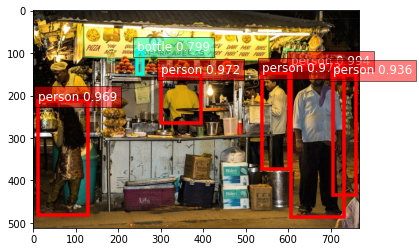

In [29]:
gcv.utils.viz.plot_bbox(chw_image, bounding_boxes, probab, class_idx, class_names=network.classes)